In [1]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
from keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

Using TensorFlow backend.


In [3]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
trans = ["飛機", "汽車", "鳥", "貓", "鹿",
         "狗", "青蛙", "馬", "船", "卡車"]

汽車


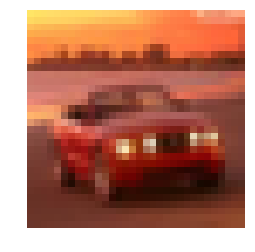

In [5]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, 49999)
plt.axis("off")
# trans[0] -> 飛機
# XX -> trans[ [0] ]
category = y_train[c][0]
print(trans[category])
plt.imshow(x_train[c])

In [6]:
# 資料預處理
# 1. 題目預處理(Normalize)
# 卷積不需要攤開, 直接進去
x_train_shape = x_train / 255
x_test_shape = x_test / 255
# DEMO
x_train_shape[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [7]:

# 2. 答案預處理(One-hot encoding)
# 跟上次一模一樣
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
# Demo
print("原來:", y_train[1])
print("後來:", y_train_cat[1])

原來: [9]
後來: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [12]:
from keras.models import Sequential
# MLP
from keras.layers import Dense, Flatten
# Conv
from keras.layers import Conv2D, MaxPooling2D
cnn = Sequential()
# (一個過濾器) 3 * 3 * 3 * (filter數目) 32 + (bias)32 = 896
cnn.add(Conv2D(32, (3, 3),
               input_shape=(32, 32, 3),
               padding="same",
               activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
# (一個過濾) 3 * 3 * 32 * (filter數目) 64 + (bias) 64 = 18496
cnn.add(Conv2D(64, (3, 3),
               padding="same",
               activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(128, (3, 3),
               padding="same",
               activation="relu"))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(256, activation="relu"))
cnn.add(Dense(10, activation="softmax"))
cnn.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
__________